<a href="https://colab.research.google.com/github/Nivea5678/Yeti-Analytics/blob/Sentiment_Analysis/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np
import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GRU, Dense
import io
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.feature_extraction.text import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
# loading the data
from google.colab import files
uploaded = files.upload()

Saving Yeti Analytics.xlsx to Yeti Analytics.xlsx


In [ ]:
# Step 1: Load the dataset into dataframe
df = pd.read_excel('Yeti Analytics.xlsx')
df


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
len(df.index)

20491

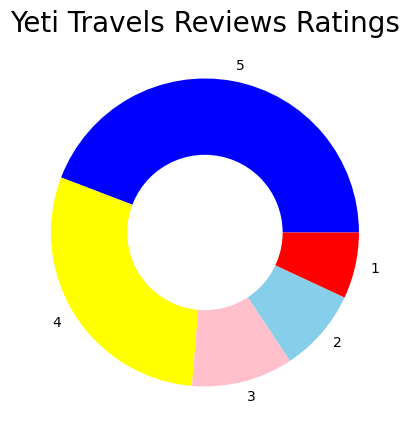

In [ ]:
import matplotlib.pyplot as plt
ratings = df["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["Blue", "yellow", 'Pink', "Skyblue", "red"]
plt.figure(figsize=(5,5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Yeti Travels Reviews Ratings", fontsize=20)
plt.show()

In [ ]:
import numpy as np

def create_sentiment(rating):

    if rating==1 or rating==2:
        return -1 # negative sentiment
    elif rating==4 or rating==5:
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df['Sentiment'] = df['Rating'].apply(create_sentiment)

###  we have to preprocess the “Review” column in order to remove punctuation characters, and digits.

In [ ]:
from sklearn.feature_extraction.text import re

def clean_data(review):

    no_punc = re.sub(r'[^\w\s]', '', review)
    no_digits = ''.join([i for i in no_punc if not i.isdigit()])

    return(no_digits)

We are looking into the 2nd row of the data and it has numerics, commas and other punctiaon marks

In [ ]:
df['Review'][2]

"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 6

When we look into this data it doesn't have any of the numeric or other punctioan marks in the below data

In [ ]:
df['Review'] = df['Review'].apply(clean_data)
df['Review'][2]

'nice rooms not  experience hotel monaco seattle good hotel nt  levelpositives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed  separate wakeup calls concierge busy hard touch did nt provide guidance special requeststv hard use ipod sound dock suite non functioning decided book mediterranean suite  night weekend stay st choice rest party filled comparison w spent  night larger square footage room great soaking tub whirlpool jets nice showerbefore stay hotel arrange car service price  tip reasonable driver waiting arrivalcheckin easy downside room picked  person jacuzi tub no bath accessories salts bubble bath did nt stay night got a checked voucher bottle champagne nice gesture fish waiting room impression room huge open space felt room big tv far away bed chore change channel ipod dock broken disappointingin morning way asked desk check thermostat said f   degrees warm try cover face ni

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df['Review'])


I am training algorithm on the review data to classify its sentiment into 3 categories:

Positive Negative Neutral, performing a train-test split:

In [ ]:
from sklearn.model_selection import train_test_split
y = df['Sentiment'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X,y)

 fitting a logistic regression classifier on the training dataset and use it to make predictions on the test data:

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train) # fit the model
preds = lr.predict(X_test) # make predictions

Evaluating the performance

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)

0.851649424165528

In [ ]:
# Preprocess the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["Review"])
y = df["Rating"]


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict the sentiment for the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.43693583800927055


In [ ]:
from keras.callbacks import EarlyStopping

# Preprocess the text data
tokenizer = Tokenizer(num_words=10000, lower=True)
tokenizer.fit_on_texts(df['Review'])
sequences = tokenizer.texts_to_sequences(df['Review'])
X = pad_sequences(sequences, maxlen=100)

y = df['Rating']



In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
model.add(Embedding(10000, 128, input_length=100))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/10
513/513 [==============================] - 182s 338ms/step - loss: -132.7516 - accuracy: 0.0688 - val_loss: -231.7315 - val_accuracy: 0.0712
Epoch 2/10
513/513 [==============================] - 167s 326ms/step - loss: -325.9139 - accuracy: 0.0689 - val_loss: -421.1459 - val_accuracy: 0.0712
Epoch 3/10
513/513 [==============================] - 168s 328ms/step - loss: -514.5780 - accuracy: 0.0689 - val_loss: -609.7730 - val_accuracy: 0.0712
Epoch 4/10
513/513 [==============================] - 173s 337ms/step - loss: -702.4431 - accuracy: 0.0689 - val_loss: -797.5079 - val_accuracy: 0.0712
Epoch 5/10
513/513 [==============================] - 167s 325ms/step - loss: -890.2521 - accuracy: 0.0689 - val_loss: -987.0408 - val_accuracy: 0.0712
Epoch 6/10
513/513 [==============================] - 166s 324ms/step - loss: -1080.7433 - accuracy: 0.0689 - val_loss: -1177.3949 - val_accuracy: 0.0712
Epoch 7/10
513/513 [==============================] - 167s 326ms/step - loss: -1270.35

In [ ]:
model = Sequential()
model.add(Embedding(10000, 128, input_length=100))
model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/10
513/513 [==============================] - 159s 300ms/step - loss: -139.3468 - accuracy: 0.0688 - val_loss: -242.0144 - val_accuracy: 0.0712
Epoch 2/10
513/513 [==============================] - 151s 294ms/step - loss: -339.7520 - accuracy: 0.0689 - val_loss: -438.7577 - val_accuracy: 0.0712
Epoch 3/10
513/513 [==============================] - 152s 297ms/step - loss: -535.6648 - accuracy: 0.0689 - val_loss: -634.5203 - val_accuracy: 0.0712
Epoch 4/10
513/513 [==============================] - 152s 295ms/step - loss: -731.0721 - accuracy: 0.0689 - val_loss: -830.0317 - val_accuracy: 0.0712
Epoch 5/10
513/513 [==============================] - 155s 302ms/step - loss: -926.1174 - accuracy: 0.0689 - val_loss: -1025.2445 - val_accuracy: 0.0712
Epoch 6/10
513/513 [==============================] - 154s 300ms/step - loss: -1121.2423 - accuracy: 0.0689 - val_loss: -1220.4917 - val_accuracy: 0.0712
Epoch 7/10
513/513 [==============================] - 151s 295ms/step - loss: -1316.1